In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
dataset = pd.read_csv("Bank.csv")
x = dataset.iloc[:, [3,4]].values
y = dataset.iloc[:, -1].values

In [12]:
print(x)

[[42  2]
 [41  1]
 [42  8]
 [39  1]
 [43  2]
 [44  8]
 [50  7]
 [29  4]
 [44  4]
 [27  2]]


In [13]:
print(y)

[1 0 1 0 0 1 0 1 0 0]


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [15]:
print(x_train)

[[27  2]
 [41  1]
 [50  7]
 [29  4]
 [39  1]
 [42  2]
 [44  8]]


In [16]:
print(x_test)

[[42  8]
 [44  4]
 [43  2]]


In [17]:
print(y_train)

[0 0 0 1 0 1 1]


In [18]:
print(y_test)

[1 0 0]


In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
print(x_train)

[[-1.56298042 -0.58966189]
 [ 0.28246634 -0.96490128]
 [ 1.46882498  1.28653504]
 [-1.29934517  0.16081688]
 [ 0.01883109 -0.96490128]
 [ 0.41428397 -0.58966189]
 [ 0.67791922  1.66177443]]


In [21]:
print(x_test)

[[ 0.41428397  1.66177443]
 [ 0.67791922  0.16081688]
 [ 0.54610159 -0.58966189]]


In [22]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [23]:
y_pred = classifier.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 0]
 [0 1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


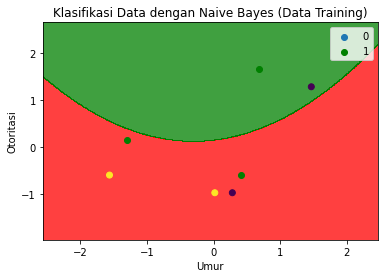

In [25]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('Umur')
plt.ylabel('Otoritasi')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


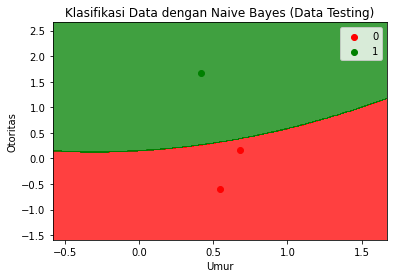

In [26]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Testing)')
plt.xlabel('Umur')
plt.ylabel('Otoritas')
plt.legend()
plt.show()